In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import random
import math

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

/tmp/ipykernel_2247/3303364975.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd                                 # Data Frame


Mand met 7 stukken fruit: 4 sinaasappels, 3 limoenen
1) Als je 1 stuk fruit neemt: Wat is de kans op een sinaasappel
2) Als je 1 stuk fruit neemt en nog een andere zonder de eerste terug te leggen. Wat is de kans dat het allebei sinaasappels zijn?
3) Als je 2 stukken neemt, wat is de kans dat het 2e stuk een sinaasappel is
4) Als je 1 stuk neemt en dan nog één en het 2 is een sinaasappel. Wat is de kans dat het eerst een sinaasappel is?

In [7]:
n=7
oranges=4
lemons=3
#Q1
q1 = oranges/n
print(q1)
print(4/7)

#Q2
first = q1
second = (oranges-1)/(n-1)
q2 = first * second
print(q2)
print(2/7)

#Q3
# 3/6 * (1-q1) + 4/6 * q1
q3 = ((oranges-1)/(n-1)) *(q1) + (oranges/(n-1)) * (1-q1)
print(q3)
print(24/42)

#Q4
q4 = 1/2
print(q4)

0.5714285714285714
0.5714285714285714
0.2857142857142857
0.2857142857142857
0.5714285714285714
0.5833333333333334
0.5714285714285714


Question 4
The diameter of pistons produced in a factory are D cm where D ~ Nor(13.4, 0.12)

(1) The tolerance specified for the pistons is that the diameter needs to be at least 13.35 cm and not more than 13.5 cm. What proportion of the production in the factory meets these tolerance limits?

(2) Three pistons are chosen at random. What is the probability that none of them meet the tolerance limits

(3) A sample of 20 pistons is taken at random. The mean value for the diameter is found to be 13.43 cm. Test at the 5% significance level whether any modifications have been made to the machine producing the pistons.

In [12]:
#Q1
mu = 13.4
sigma = 0.12
lower_limit = 13.35
upper_limit = 13.5
chance = stats.norm.cdf(upper_limit, loc=mu,scale=sigma)-stats.norm.cdf(lower_limit,loc=mu,scale=sigma)
print(f'{lower_limit}<p<{upper_limit} probability is = {chance}')


13.35<p<13.5 probability is = 0.4592104995256687


In [14]:
#Q2
not_meet_tolerance = 1 - chance
times_not_met_3 = not_meet_tolerance*not_meet_tolerance*not_meet_tolerance
print(f'Chance that 3 pistons do not meet the tolerance limit: {times_not_met_3}')

Chance that 3 pistons do not meet the tolerance limit: 0.15815566527086766


In [19]:
import math
# GEEN t-test, want je mag z-test gebruken, want normale verdeling => right-tailed z-test (want 13.43 ligt aan de rechterkant van de mu)
# H0 er zijn geen wijzigingen aangebracht aan de machine
# H1 Er zijn wel wijzigingen aangebracht aan de machine, het gemiddelde is hoger dan 13.4
n = 20
sample_mean = 13.43
alpha = 0.05
p = stats.norm.sf(sample_mean, loc=mu, scale=sigma/np.sqrt(n))

print("p-value: %.5f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")

#2e manier:
g = stats.norm.isf(alpha, loc=mu, scale=sigma / np.sqrt(n)) #Kijken wat de critical value is op limiet 5%
print("Critical value g ≃ %.3f" % g)
if (sample_mean < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (sample_mean, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (sample_mean, g))

p-value: 0.13178
p > alpha: do not reject H0
Critical value g ≃ 13.444
sample mean = 13.430 < g = 13.444: do not reject H0


P > alpha: H0 niet verwerpen: Er is geen reden om te stellen dat er wijzigingen zijn gedaan aan de machine.

# Question 5

The number of employees on the payroll at a food processing company is recorded at the beginning of each month. These data are given below.

1. Give the data types of both columns
2. Convert the 'date' column to datetime type. Even if this fails you can continue working.
3. Create the following plot.

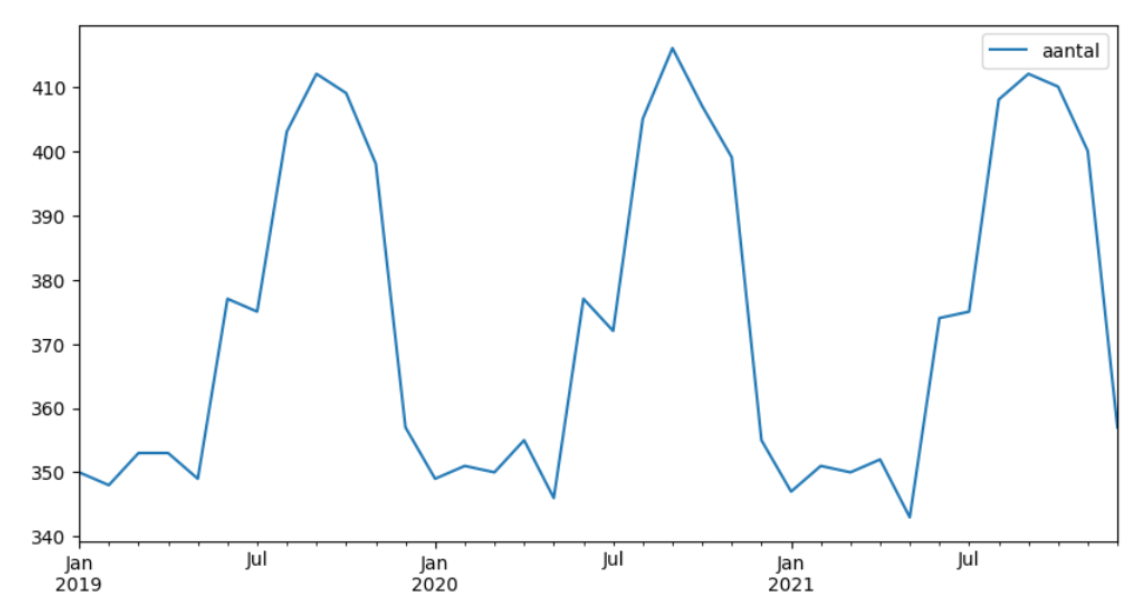

4. Make a forecast for the first four months of the next year using the most appropriate method. Explain why you chose this method.
5. Make a plot including the forecast.
6. Make the following calculations

6.1 Calculate the average number of employees in 2020

6.2 How many months did the company have more than 400 employees?

In [3]:
dfemployees = pd.DataFrame(data={
    'recording_date': ['2019/01/01', '2019/02/01', '2019/03/01', '2019/04/01', '2019/05/01', '2019/06/01', '2019/07/01', '2019/08/01', '2019/09/01', '2019/10/01', '2019/11/01', '2019/12/01', '2020/01/01', '2020/02/01', '2020/03/01', '2020/04/01', '2020/05/01', '2020/06/01', '2020/07/01', '2020/08/01', '2020/09/01', '2020/10/01', '2020/11/01', '2020/12/01', '2021/01/01', '2021/02/01', '2021/03/01', '2021/04/01', '2021/05/01', '2021/06/01', '2021/07/01', '2021/08/01', '2021/09/01', '2021/10/01', '2021/11/01', '2021/12/01'],
    'number': [350,348,353,353,349,377,375,403,412,409,398,357,349,351,350,355,346,377,372,405,416,407,399,355,347,351,350,352,343,374,375,408,412,410,400,357]
})


In [5]:
dfemployees.dtypes

recording_date    object
number             int64
dtype: object

In [11]:
dfemployees.recording_date = pd.to_datetime(dfemployees.recording_date)
dfemployees = dfemployees.set_index('recording_date')
dfemployees.head()

,number
recording_date,
2019-01-01,350
2019-02-01,348
2019-03-01,353
2019-04-01,353
2019-05-01,349


<Axes: xlabel='recording_date'>

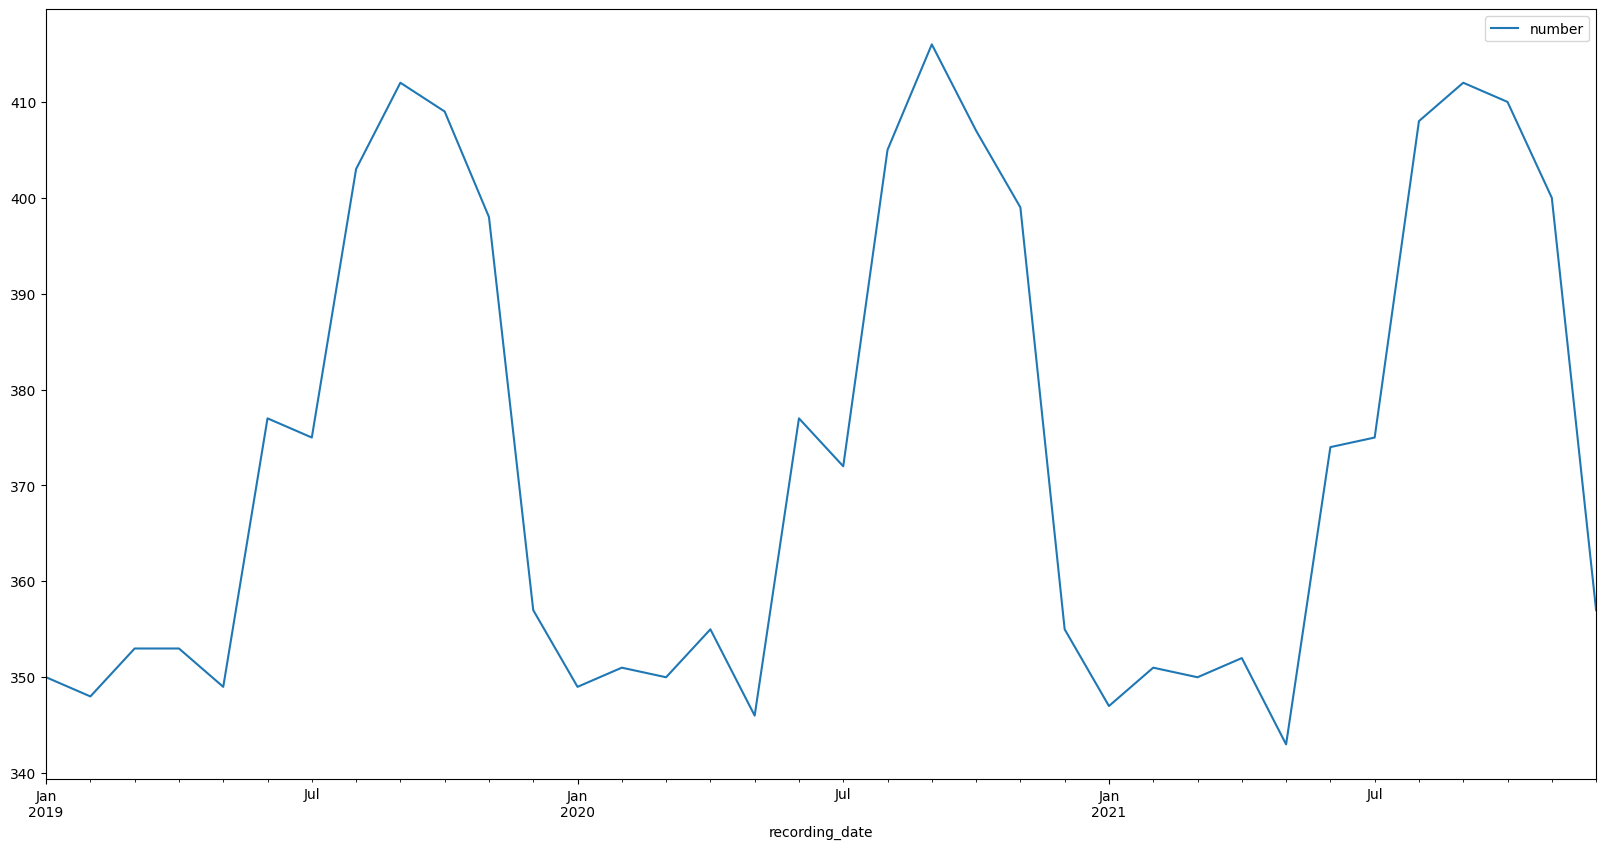

In [14]:
dfemployees.plot(y='number',figsize=(20,10))


<Axes: xlabel='recording_date'>

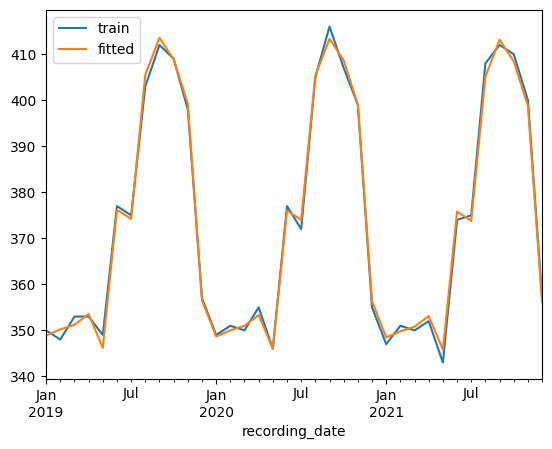

In [15]:
# We gebruiken want er is een seizoen (& vlakke trend)
from statsmodels.tsa.holtwinters import ExponentialSmoothing
train = dfemployees.number

dfemployees_hw = ExponentialSmoothing(train, trend='add',
                                      seasonal='add', seasonal_periods=12,
                                      freq='MS').fit()

train.plot(legend=True, label='train')
(dfemployees_hw.level + dfemployees_hw.season).plot(legend=True, label='fitted')

36


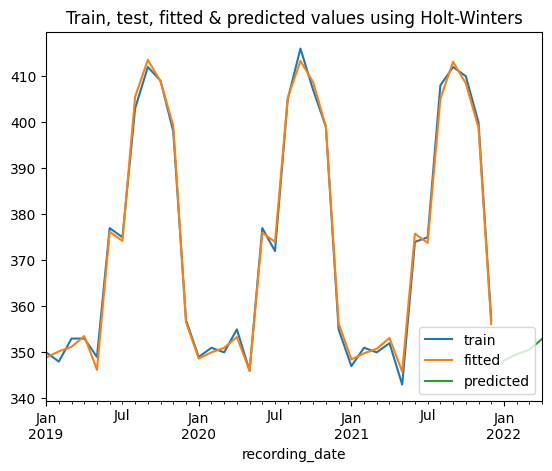

In [19]:
dfemployees_forecast = dfemployees_hw.forecast(4)
train.plot(legend=True, label='train')
dfemployees_hw.fittedvalues.plot(legend=True, label='fitted')
dfemployees_forecast.plot(legend=True, label='predicted')
plt.title('Train, test, fitted & predicted values using Holt-Winters')



In [27]:
#Q 6.1
data_2020 = dfemployees['2020-01-01':'2020-12-31'].mean()
print(data_2020)
#Q 6.2
print(len(dfemployees[dfemployees.number > 400]))
# of dfemployees[dfemployees.number > 400].count()

number    373.5
dtype: float64
9


# Question 6
The sample given below contains measurement results of a variable Temperature at two time points (time1 and time2). We want to know whether the measurements at the second time point are significantly different from those at the first time point.

Use an appropriate statistical test (with significance level 5%) to verify this statement.

1. Visualise the data with an appropriate plot. What can you infer about the research question? Explain.
2. What statistical test should you use to answer this research question? Be as specific as possible!
3. Formulate the null hypothesis and the alternative hypothesis.
4. Calculate the p-value.
5. Draw a conclusion based on the previous step and formulate an answer to the research question.
6. Give for the observations at time time1:
    A. The interquartile range
    B. The kurtosis
    C. The range
    D. The standard deviation

In [28]:

temperatures = pd.DataFrame(data={
  'time1': [65, 87, 59, 71, 58, 74, 55, 98, 62, 53, 84, 63, 78, 62, 60],
  'time2': [82, 91, 86, 83, 85, 51, 65, 61, 76, 65, 53, 70, 51, 55, 68]
})

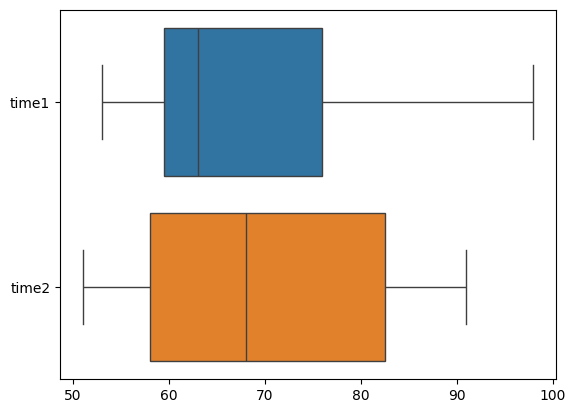

In [32]:
# Onafhankelijke variabele: tijdstip 1 en tijdstip 2 : Kwalitatieve variabelen
# Afhankelijke variabele: cijfers in de groep van de tijdstippen: Kwantitatieve variabelen
# -> H5 Bivariate qual-quant analyse => two sample t-test
alpha = 0.05
sns.boxplot(data=temperatures,orient='h');

H0 : er is geen significant verschil tussen de waardes op time1 en time 2
H1 : De waardes op time2 zijn significant groter

In [34]:
# paired to sample t-test: bij alternative vullen we less in, want uit plot lijkt boxplot op time 1 kleiner
# Stel je ziet het niet, dan reken je de gemiddeldes uit
gemid_1 = temperatures.time1.mean()
gemid_2 = temperatures.time2.mean()
print(gemid_1)
print(gemid_2)
test_statistiek, p_value = stats.ttest_rel(temperatures.time1, temperatures.time2, alternative='less')
p_value


68.6
69.46666666666667


0.43719974299972214

Conclusie: H0 niet verwerpen, er is geen significant verschil tussen de waardes op time1 en time2

In [39]:
# Q6
print(f'Interquartile range: {np.quantile(temperatures.time1,0.75)-np.quantile(temperatures.time1,0.25)}')
print(f"Kurtosis:            {temperatures.time1.kurtosis()}")
print(f'Range: {np.max(temperatures.time1)-np.min(temperatures.time1)}')
print(f'Standard deviation: {temperatures.time1.std()}')

Interquartile range: 16.5
Kurtosis:            0.15796776764037945
Range: 45
Standard deviation: 13.09743704481366
